In [9]:
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt
from  cooler_extended import CoolerExtended

In [10]:
filepath = 'data/Rao2014-IMR90-MboI-allreps-filtered.500kb.cool'
bases_in_bin = 500000 #for resolution 500kb - 500000
chr_number = "2" #number of interested chromosome or "X"
c = CoolerExtended(filepath)
sv_master_table = pd.read_csv("result.csv",delimiter = "\t")

In [11]:
#getting normilized hiс matrix by chromosome
matrix = c.hic_matrices_normalized["chr"+chr_number]
#getting SVs
sv_for_chr = sv_master_table[sv_master_table["chrom1"]==chr_number][sv_master_table["chrom2"]==chr_number]

sv_bins_x = sv_for_chr["start1"] // bases_in_bin
sv_bins_y = sv_for_chr["start2"] // bases_in_bin
sv_ok = (sv_bins_x - sv_bins_y).abs() > 1

sv_bins_x = sv_bins_x[sv_ok]
sv_bins_y = sv_bins_y[sv_ok]

<ipython-input-11-65d729116efb>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sv_for_chr = sv_master_table[sv_master_table["chrom1"]==chr_number][sv_master_table["chrom2"]==chr_number]


In [ ]:
#getting normilized hiс matrix by chromosome
matrix = c.hic_matrices_normalized["chr"+chr_number]
#getting SVs
sv_for_chr = sv_master_table[(sv_master_table["chrom1"]==chr_number) & (sv_master_table["chrom2"]==chr_number)]

sv_bins_x = []
sv_bins_y = []
for x,y in zip(sv_for_chr["start1"].tolist(),sv_for_chr["start2"].tolist()):
    if abs((x//bases_in_bin)-(y//bases_in_bin))>1:
        sv_bins_x.append(x//bases_in_bin)
        sv_bins_y.append(y//bases_in_bin)

<ipython-input-12-136a472ad5bc>:3: RuntimeWarning: divide by zero encountered in log10
  im = ax.matshow(np.log10(matrix), cmap='YlOrRd')


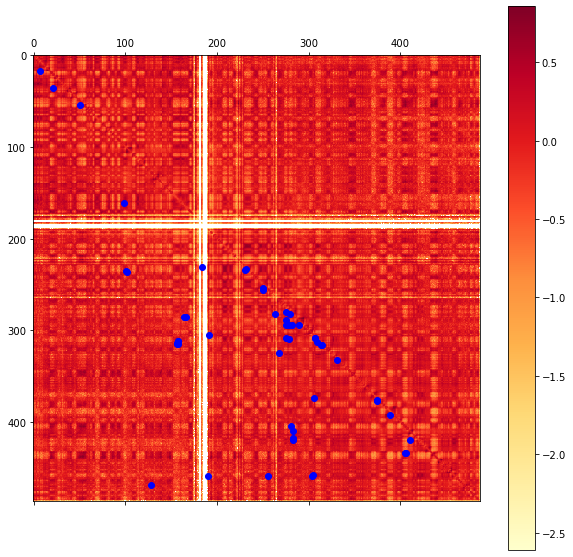

In [12]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
im = ax.matshow(np.log10(matrix), cmap='YlOrRd')
fig.colorbar(im)
plt.scatter(sv_bins_x,sv_bins_y,c="blue")
plt.show()

In [21]:
#get hic scores for SVs
sv_hic_score = [matrix[x][y] for x,y in zip(sv_bins_x,sv_bins_y)]

#get hic scores for chromothripsis
chr_for_hic = sv_for_chr[sv_for_chr["chromo_label1"] != "No"]
                                            
chr_bins_x = chr_for_hic["start1"] // bases_in_bin
chr_bins_y = chr_for_hic["start2"] // bases_in_bin
                                            
chr_ok = (chr_bins_x - chr_bins_y).abs() > 1
chr_bins_x = chr_bins_x[sv_ok]
chr_bins_y = chr_bins_y[sv_ok]
            
chr_hic_score = [matrix[x][y] for x,y in zip(chr_bins_x,chr_bins_y)]              

#get hic scores for shifted chromothripsis
chr_len = matrix.shape[0]
                                            
chr_shift_bins_x = (chr_bins_x + 10) % chr_len
chr_shift_bins_y = (chr_bins_y + 10) % chr_len
                                                                         
chr_shift_hic_score = [matrix[x][y] for x,y in zip(chr_shift_bins_x,chr_shift_bins_y)]

#get hic scores for shifted SVs
sv_shift_bins_x = (sv_bins_x + 10) % chr_len
sv_shift_bins_y = (sv_bins_y + 10) % chr_len
    
sv_shift_hic_score = [matrix[x][y] for x,y in zip(sv_shift_bins_x,sv_shift_bins_y)]

In [23]:
#get hic scores for SVs
sv_hic_score = []
for x,y in zip(sv_bins_x,sv_bins_y):
    sv_hic_score.append(matrix[x][y])

#get hic scores for chromothripsis
chr_hic_score = []
chr_for_hic = sv_master_table[sv_master_table["chrom1"]==chr_number][sv_master_table["chrom2"]==chr_number][sv_master_table["chromo_label1"]!="No"]
chr_bins_x = []
chr_bins_y = []
for x,y in zip(chr_for_hic["start1"].tolist(),chr_for_hic["start2"].tolist()):
        if abs((x//bases_in_bin)-(y//bases_in_bin))>1:
            chr_bins_x.append(x//bases_in_bin)
            chr_bins_y.append(y//bases_in_bin)
            
for x,y in zip(chr_bins_x,chr_bins_y):
    chr_hic_score.append(matrix[x][y])

#get hic scores for shifted chromothripsis
chr_shift_hic_score = []
chr_shift_bins_x = []
chr_shift_bins_y = []
for x,y in zip(chr_bins_x,chr_bins_y):
    chr_shift_bins_x.append((x+10)%matrix.shape[0])
    chr_shift_bins_y.append((y+10)%matrix.shape[0])
for x,y in zip(chr_shift_bins_x,chr_shift_bins_y):
    chr_shift_hic_score.append(matrix[x][y])

#get hic scores for shifted SVs
sv_shift_hic_score = []
sv_shift_bins_x = []
sv_shift_bins_y = []
for x,y in zip(sv_bins_x,sv_bins_y):
    sv_shift_bins_x.append((x+10)%matrix.shape[0])
    sv_shift_bins_y.append((y+10)%matrix.shape[0])
for x,y in zip(sv_shift_bins_x,sv_shift_bins_y):
    sv_shift_hic_score.append(matrix[x][y])

<ipython-input-23-11be02a57fc0>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  chr_for_hic = sv_master_table[sv_master_table["chrom1"]==chr_number][sv_master_table["chrom2"]==chr_number][sv_master_table["chromo_label1"]!="No"]


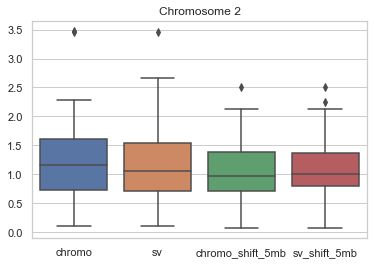

In [24]:
import seaborn as sns

sns.set_theme(style="whitegrid")
df = pd.DataFrame(list(zip(chr_hic_score, sv_hic_score, chr_shift_hic_score, sv_shift_hic_score)))
df.columns=['chromo','sv','chromo_shift_5mb','sv_shift_5mb']
ax = sns.boxplot(data=df).set_title("Chromosome "+chr_number)